In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
import os
import requests
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:

def model_stealing(path_to_png_file: str):
    SERVER_URL = "http://34.71.138.79:9090"
    endpoint = "/modelstealing"
    TEAM_TOKEN = "X55E27lOG6LS3QRm"
    url = SERVER_URL + endpoint
    with open(path_to_png_file, "rb") as f:
        response = requests.get(url, files={"file": f}, headers={"token": TEAM_TOKEN})
        if response.status_code == 200:
            representation = response.json()["representation"]
            print("Request ok")
            return representation
        else:
            raise Exception(
                f"Model stealing failed. Code: {response.status_code}, content: {response.json()}"
            )

In [48]:
#model_stealing(["data/labels_ids_png/6661858_163933.png", "data/labels_ids_png/6661858_163973.png"])

In [19]:
def model_stealing_list_of_files(files_to_fetch, no_times=1):
    for file in files_to_fetch:
        directory = "representations/{}".format(file)
        if not os.path.exists(directory):
            os.makedirs(directory)
        for n_time in range(no_times):
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            representation = model_stealing("data/labels_ids_png/{}.png".format(file))
            np.savez(directory+"/{}_{}.npz".format(file, timestamp), representation=representation)
            time.sleep(0.25)

In [63]:
def load_file_representations(label_ids):
    for label_id in label_ids:
        filenames = [filename for filename in os.listdir('representations/{}'.format(label_id))]
        reference_representation = np.load("representations/{}/{}".format(label_id, filenames[0]))["representation"]
        mse_list = []
        for filename in filenames:
            representation = np.load("representations/{}/{}".format(label_id, filename))["representation"]
            mse_list.append(mean_squared_error(reference_representation, representation))
        plt.plot(mse_list, label = "label_id")
    plt.legend() 
    plt.show()
    #return mse_list

In [33]:
def check_mse(label_ids, no_times=5):
    model_stealing_list_of_files(label_ids, no_times)
    load_file_representations(label_ids)

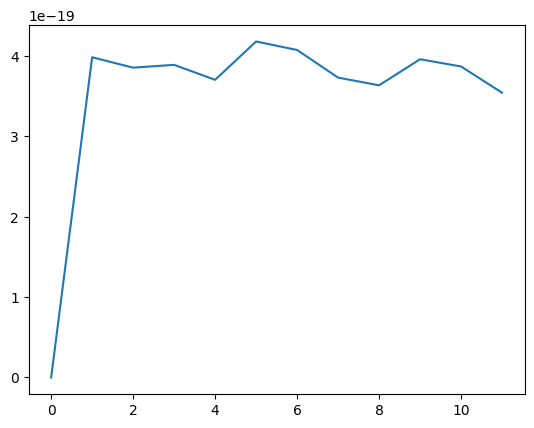

In [50]:
load_file_representations("6661858_163933")

In [20]:
model_stealing_list_of_files(["6661858_163973"], no_times=5)

Request ok
Request ok
Request ok
Request ok
Request ok


Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok


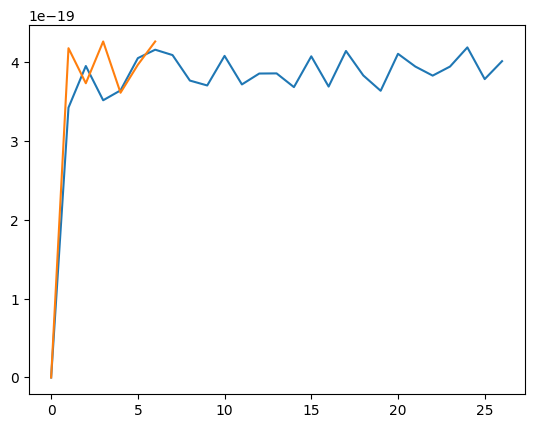

In [34]:
check_mse(["6661858_163974", "6661858_164595"], no_times=10)

Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok


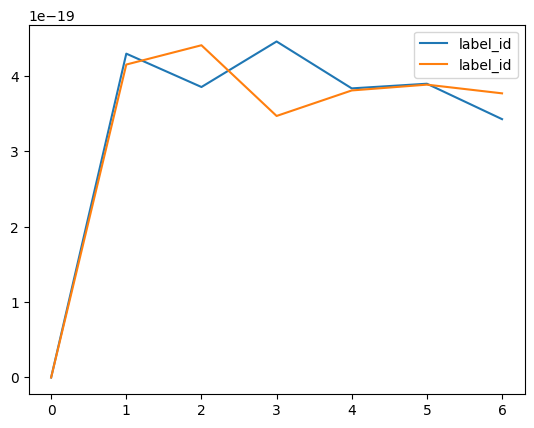

In [36]:
check_mse(["6661858_164737", "6661858_164754"], no_times=10)

In [46]:
label_ids_groups = [["62225416_175117", "15103694_191637", "26466207_203728", "14119474_264497", "24683694_224491"],
 ["62014378_102986", "90386222_104368", "31527279_99210", "68395620_133838", "62014378_104564"],
 ["75652382_11846", "83450130_54992", "70483417_28436", "40019202_33799", "75986657_60185"]]
control_label_id = "6661858_164865"

In [61]:
def control_mse(label_ids_groups, control_label_id, no_times=1):

    ## steal
    control_directory = "representations/{}".format(control_label_id)
    if not os.path.exists(control_directory):
       os.makedirs(control_directory)
    for files_to_fetch in label_ids_groups:
        for file in files_to_fetch:
            directory = "representations/{}".format(file)
            if not os.path.exists(directory):
                os.makedirs(directory)
            for n_time in range(no_times):
                timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
                representation = model_stealing("data/labels_ids_png/{}.png".format(file))
                np.savez(directory+"/{}_{}.npz".format(file, timestamp), representation=representation)
                control_representation = model_stealing("data/labels_ids_png/{}.png".format(control_label_id))
                np.savez(control_directory+"/{}_{}.npz".format(control_label_id, timestamp), representation=control_representation)
                time.sleep(0.25)
            
    # show mse
    load_file_representations([control_label_id])

In [62]:
control_mse(label_ids_groups, control_label_id)

Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok


FileNotFoundError: [Errno 2] No such file or directory: 'representations/6661858_164865/6661858_164865_20240316_205507.npz.png'

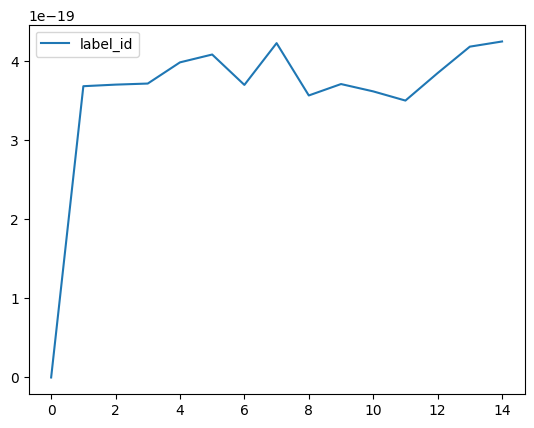

In [64]:
load_file_representations([control_label_id])